# Pymaceuticals Inc.
---

### Analysis

- Among mice exposed to Capomulin, there is a strong, positive relationship between mouse weight and tumor volume at final reading.


- Though it appears that the tumor volume of mice given either Capomulin or Ramicane was much smaller than other treatment groups at final reading, it should be noted that their mean tumor size was significantly smaller across all timepoints. Further analysis, using a time series, would be required to determine whether it was the drug intervention that influenced tumor volume.


- A potential outlier exists in the Infubinol group. One mouse gave a final tumor volume reading well below the threshold for an outlier (i.e. scored below Q1 * (1.5 interquartile range)). Distribution of the Infubinol group should be interpreted with caution.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import sem
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_data=pd.merge(mouse_metadata,study_results,on="Mouse ID",how="outer")
# Display the data table for preview
mice_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
mice_data["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice=mice_data.loc[mice_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
reduced_mice = mice_data.drop(mice_data[mice_data['Mouse ID']=="g989"].index)
reduced_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
reduced_mice["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


# Assemble the resulting series into a single summary DataFrame.
drug_group=reduced_mice.groupby(['Drug Regimen'])


tumor_mean=drug_group['Tumor Volume (mm3)'].mean()
tumor_median=drug_group['Tumor Volume (mm3)'].median()
tumor_var=drug_group['Tumor Volume (mm3)'].var()
tumor_std=drug_group['Tumor Volume (mm3)'].std()
tumor_stderr=drug_group['Tumor Volume (mm3)'].sem()

drug_summary_df=pd.DataFrame({"mean":tumor_mean,"median":tumor_median,"var":tumor_var,"std":tumor_std,"sem":tumor_stderr})
drug_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
drug_group.agg({'Tumor Volume (mm3)':[np.mean, np.median, np.var, np.std, sem]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

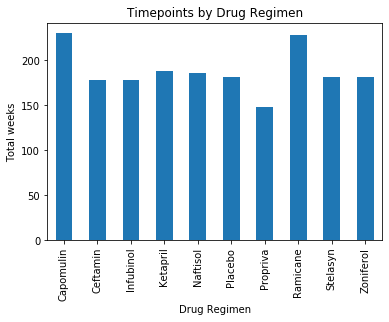

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_bar=drug_group['Timepoint']
drug_bar=drug_bar.count()
fig1=drug_bar.plot(kind="bar", title="Timepoints by Drug Regimen")
fig1.set_ylabel("Total weeks")
plt.show()

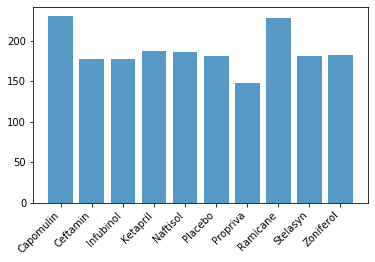

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
fig, ax = plt.subplots()
group_plot=reduced_mice.groupby('Drug Regimen')['Mouse ID'].count()
drugs=["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
x_axis=[0,len(group_plot)]
tick_locations = []

for x in x_axis:
    tick_locations.append(x)
Y_axis=[]

for drug in group_plot:
    Y_axis.append(drug)

plt.bar(drugs,Y_axis, alpha=0.75, align="center")
fig.autofmt_xdate(rotation=45)
plt.show()

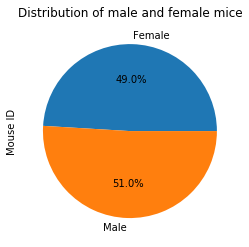

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mf_group=mice_data.groupby(['Sex'])
mf_df=reduced_mice.groupby(['Sex'])
mf_pie=mf_df['Mouse ID'].count()
mf_pie_plot=mf_pie.plot(kind='pie',y=mf_pie, title=("Distribution of male and female mice"), autopct='%1.1f%%')

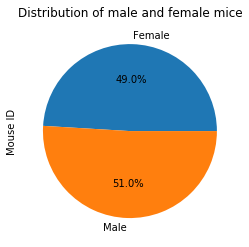

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male","Female"]

mf_pie_plot=mf_pie.plot(kind="pie", y='Mouse ID', title="Distribution of male and female mice",autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse 
#merge with the original DataFrame to get the tumor volume at the last timepoint
mouse_group_max=reduced_mice.loc[reduced_mice.groupby(['Mouse ID'])['Timepoint'].idxmax()]
mouse_group_max.head()
mouse_group_max.reset_index()
mouse_merge=pd.merge(mouse_group_max,reduced_mice)
mouse_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset    
    # Determine outliers using upper and lower bounds

for treatment in treatments:
    tumor_vol.append(mouse_merge.loc[mouse_merge['Drug Regimen']==treatment,'Tumor Volume (mm3)'])      

Capomulin=tumor_vol[0]
Ramicane=tumor_vol[1]
Infubinol=tumor_vol[2]
Ceftamin=tumor_vol[3]

#Capumulin outliers test
Cap_quartiles=Capomulin.quantile([.25,.5,.75])
Cap_lowerq = Cap_quartiles[0.25]
Cap_upperq = Cap_quartiles[0.75]
Cap_iqr = Cap_upperq-Cap_lowerq

Cap_lower_bound = Cap_lowerq-(1.5*Cap_iqr)
Cap_upper_bound = Cap_upperq+(1.5*Cap_iqr)

cap_outliers=[]
for c in Capomulin:
    if (c < Cap_lower_bound) | (c > Cap_upper_bound):
        cap_outliers.append(c)

#Ramicane outliers test        
Ram_quartiles=Ramicane.quantile([.25,.5,.75])
Ram_lowerq = Ram_quartiles[0.25]
Ram_upperq = Ram_quartiles[0.75]
Ram_iqr = Ram_upperq-Ram_lowerq

Ram_lower_bound = Ram_lowerq-(1.5*Ram_iqr)
Ram_upper_bound = Ram_upperq+(1.5*Ram_iqr)

Ram_outliers=[]
for r in Ramicane:
    if (r < Ram_lower_bound) | (r > Ram_upper_bound):
        Ram_outliers.append(r)

#Infubinol outliers test        
Inf_quartiles=Infubinol.quantile([.25,.5,.75])
Inf_lowerq = Inf_quartiles[0.25]
Inf_upperq = Inf_quartiles[0.75]
Inf_iqr = Inf_upperq-Inf_lowerq

Inf_lower_bound = Inf_lowerq-(1.5*Inf_iqr)
Inf_upper_bound = Inf_upperq+(1.5*Inf_iqr)

Inf_outliers=[]
for i in Infubinol:
    if (i <= Inf_lower_bound) | (i >= Inf_upper_bound):
        Inf_outliers.append(i)

#Ceftamin outliers test
Cef_quartiles=Ceftamin.quantile([.25,.5,.75])
Cef_lowerq = Cef_quartiles[0.25]
Cef_upperq = Cef_quartiles[0.75]
Cef_iqr = Cef_upperq-Inf_lowerq

Cef_lower_bound = Cef_lowerq-(1.5*Cef_iqr)
Cef_upper_bound = Cef_upperq+(1.5*Cef_iqr)

Cef_outliers=[]
for c in Ceftamin:
    if (c <= Cef_lower_bound) | (c >= Cef_upper_bound):
        Cef_outliers.append(c) 
        
print(f"Capomulin's potential outliers: {cap_outliers}")
print(f"Ramicane's potential outliers: {Ram_outliers}")
print(f"Infubinol's potential outliers: {Inf_outliers}")
print(f"Ceftamin's potential outliers: {Cef_outliers}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.321345799999996]
Ceftamin's potential outliers: []


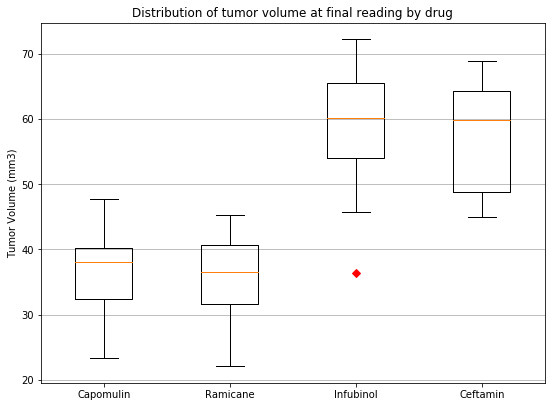

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data=[Capomulin,Ramicane,Infubinol,Ceftamin]
fig=plt.figure(figsize =(7, 5))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data,sym='rD')
ax.yaxis.grid(True)
ax.set_xticklabels(treatments)
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Distribution of tumor volume at final reading by drug")
plt.show()

## Line and Scatter Plots

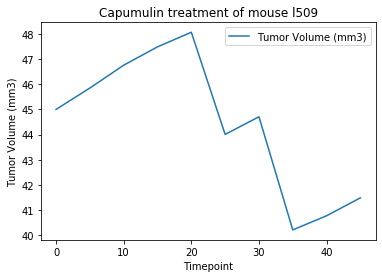

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_time=reduced_mice.loc[reduced_mice["Mouse ID"]=="l509",['Timepoint','Tumor Volume (mm3)']]
mouse_time=mouse_time.set_index("Timepoint")
figure1=mouse_time.plot(kind='line')
figure1.set_ylabel("Tumor Volume (mm3)")
plt.title("Capumulin treatment of mouse l509")
plt.show()

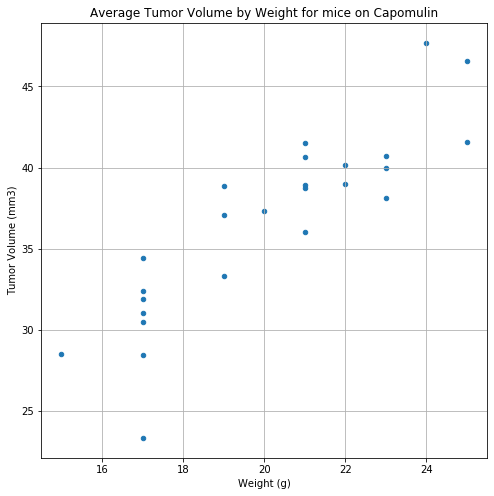

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_weight=mouse_merge.loc[mouse_merge["Drug Regimen"]=="Capomulin"]
tumor_scatter=tumor_weight.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8), title="Average Tumor Volume by Weight for mice on Capomulin" )
plt.show()

# Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.88.


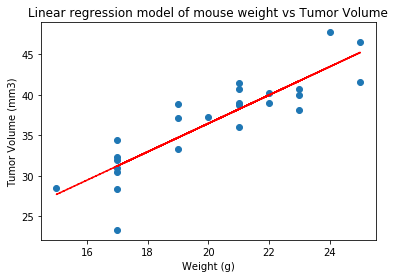

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight=tumor_weight['Weight (g)']
vol=tumor_weight['Tumor Volume (mm3)']
correl=stats.pearsonr(weight,vol)

cap_slope, cap_int, cap_r, cap_p, cap_std_err=stats.linregress(weight, vol)
cap_fit=cap_slope*weight+cap_int

print(f'The correlation between mouse weight and average tumor volume is {round(correl[0],2)}.')

plt.scatter(weight,vol)
plt.plot(weight,cap_fit,"--",color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Linear regression model of mouse weight vs Tumor Volume')
plt.show()
